In [1]:
import torch

In [22]:
testing = torch.tensor([[9., 10., 11.], [12., 13., 14.]])

In [14]:
testing.shape

torch.Size([2])

In [16]:
testing.item()

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

In [25]:
testing.mean().mean()

tensor(11.5000)

In [43]:
import torch
import pandas as pd



# Simulated batch size and number of classes
batch_size = 4
num_classes = 3  # Assume 3 possible classes
dim_rot = 6  # 6D rotation representation

# Simulated predictions (random values)
R_pred = torch.rand(batch_size, num_classes * dim_rot)  # Rotation predictions
t_pred = torch.rand(batch_size, num_classes * 3)  # Translation predictions

# Simulated class predictions (random integer class indices per sample)
cls_pred = torch.randint(0, num_classes, (batch_size,))  # Random class index per sample

print('cls_pred', cls_pred)
# Ensure integer type
cls_index = cls_pred.long()

# Compute per-sample start indices
rot_start = cls_index * dim_rot
trans_start = cls_index * 3

print('rot_start', rot_start)
print('trans_start', trans_start)

# Extract the rotation and translation using batch-wise advanced indexing
R_indexing = torch.stack([torch.arange(rot_start[i], rot_start[i] + dim_rot) for i in range(batch_size)])
t_indexing = torch.stack([torch.arange(trans_start[i], trans_start[i] + 3) for i in range(batch_size)])

print('R_indexing', R_indexing)
print('t_indexing', t_indexing)
R_extracted = R_pred[torch.arange(batch_size)[:, None], R_indexing]
t_extracted = t_pred[torch.arange(batch_size)[:, None], t_indexing]

# Print extracted matrices
print("Extracted Rotation Matrices:")
print(R_extracted.shape)
print("\nExtracted Translation Matrices:")
print(t_extracted.shape)


cls_pred tensor([2, 0, 2, 1])
rot_start tensor([12,  0, 12,  6])
trans_start tensor([6, 0, 6, 3])
R_indexing tensor([[12, 13, 14, 15, 16, 17],
        [ 0,  1,  2,  3,  4,  5],
        [12, 13, 14, 15, 16, 17],
        [ 6,  7,  8,  9, 10, 11]])
t_indexing tensor([[6, 7, 8],
        [0, 1, 2],
        [6, 7, 8],
        [3, 4, 5]])
Extracted Rotation Matrices:
torch.Size([4, 6])

Extracted Translation Matrices:
torch.Size([4, 3])


In [45]:
R_pred

tensor([[0.4717, 0.8509, 0.1280, 0.8388, 0.1803, 0.6633, 0.8244, 0.6493, 0.5884,
         0.1518, 0.4907, 0.8135, 0.5296, 0.3104, 0.8536, 0.1434, 0.9107, 0.2711],
        [0.8638, 0.3225, 0.9721, 0.4990, 0.0674, 0.0750, 0.2197, 0.6394, 0.6462,
         0.6034, 0.7747, 0.9423, 0.5737, 0.9066, 0.2224, 0.4659, 0.5855, 0.8161],
        [0.4443, 0.2776, 0.1897, 0.7521, 0.8063, 0.6408, 0.8260, 0.3800, 0.2582,
         0.9961, 0.9415, 0.4123, 0.1445, 0.5815, 0.2683, 0.2465, 0.0472, 0.9260],
        [0.3122, 0.9945, 0.6771, 0.0409, 0.0926, 0.7901, 0.7045, 0.2023, 0.9303,
         0.9630, 0.2565, 0.0662, 0.5055, 0.4021, 0.9066, 0.9510, 0.2335, 0.4566]])

In [44]:
R_extracted

tensor([[0.5296, 0.3104, 0.8536, 0.1434, 0.9107, 0.2711],
        [0.8638, 0.3225, 0.9721, 0.4990, 0.0674, 0.0750],
        [0.1445, 0.5815, 0.2683, 0.2465, 0.0472, 0.9260],
        [0.7045, 0.2023, 0.9303, 0.9630, 0.2565, 0.0662]])

In [46]:
t_extracted

tensor([[0.7618, 0.3083, 0.5601],
        [0.3799, 0.4520, 0.3295],
        [0.6412, 0.4071, 0.5284],
        [0.4910, 0.4273, 0.3910]])

In [48]:
t_pred

tensor([[0.5338, 0.8820, 0.7120, 0.1937, 0.9668, 0.5100, 0.7618, 0.3083, 0.5601],
        [0.3799, 0.4520, 0.3295, 0.8789, 0.5184, 0.3284, 0.0094, 0.0646, 0.9384],
        [0.1873, 0.1266, 0.1857, 0.9356, 0.8210, 0.0435, 0.6412, 0.4071, 0.5284],
        [0.4274, 0.7709, 0.1901, 0.4910, 0.4273, 0.3910, 0.1683, 0.7589, 0.8664]])

In [51]:
def extract_rotation_translation_matrices(cls_pred, R_pred, t_pred, dimension_rotation, dimension_translation):
    cls_index = cls_pred.long()
    batch_size = R_pred.shape[0]
    
    rot_start = cls_index * dimension_rotation
    trans_start = cls_index * dimension_translation

    R_indexing = torch.stack([torch.arange(rot_start[i], rot_start[i] + dimension_rotation) for i in range(batch_size)])
    t_indexing = torch.stack([torch.arange(trans_start[i], trans_start[i] + dimension_translation) for i in range(batch_size)])

    R_extracted = R_pred[torch.arange(batch_size)[:, None], R_indexing]
    t_extracted = t_pred[torch.arange(batch_size)[:, None], t_indexing]

    return R_extracted, t_extracted

In [52]:
extract_rotation_translation_matrices(cls_pred, R_pred, t_pred, dim_rot, 3)

(tensor([[0.5296, 0.3104, 0.8536, 0.1434, 0.9107, 0.2711],
         [0.8638, 0.3225, 0.9721, 0.4990, 0.0674, 0.0750],
         [0.1445, 0.5815, 0.2683, 0.2465, 0.0472, 0.9260],
         [0.7045, 0.2023, 0.9303, 0.9630, 0.2565, 0.0662]]),
 tensor([[0.7618, 0.3083, 0.5601],
         [0.3799, 0.4520, 0.3295],
         [0.6412, 0.4071, 0.5284],
         [0.4910, 0.4273, 0.3910]]))

In [54]:
t_extracted

tensor([[0.7618, 0.3083, 0.5601],
        [0.3799, 0.4520, 0.3295],
        [0.6412, 0.4071, 0.5284],
        [0.4910, 0.4273, 0.3910]])

In [56]:
t_extracted[[False, False, False, False]]

tensor([], size=(0, 3))

In [63]:
if not torch.isnan(torch.tensor(3)):
    print('yes')

yes


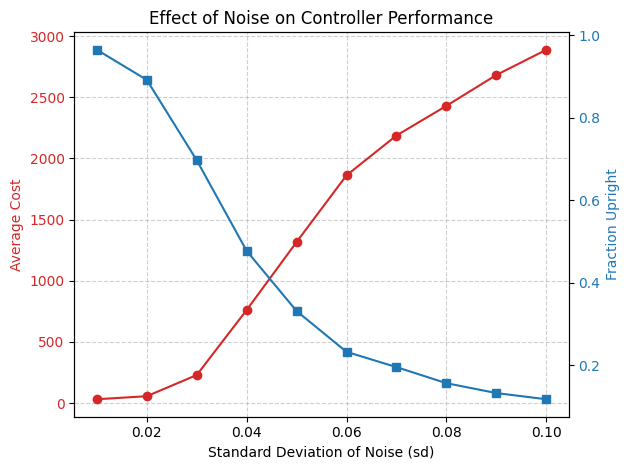

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the log file
sd_values = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
average_cost = np.array([31.093, 55.991, 229.033, 760.757, 1316.507, 1861.451, 2186.878, 2429.285, 2681.510, 2887.431])
fraction_upright = np.array([0.965, 0.892, 0.697, 0.477, 0.331, 0.232, 0.195, 0.156, 0.132, 0.117])

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot Average Cost
color = 'tab:red'
ax1.set_xlabel('Standard Deviation of Noise (sd)')
ax1.set_ylabel('Average Cost', color=color)
ax1.plot(sd_values, average_cost, marker='o', linestyle='-', color=color, label='Average Cost')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# Create second y-axis for fraction upright
aq2 = ax1.twinx()
color = 'tab:blue'
aq2.set_ylabel('Fraction Upright', color=color)
aq2.plot(sd_values, fraction_upright, marker='s', linestyle='-', color=color, label='Fraction Upright')
aq2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Effect of Noise on Controller Performance')
fig.tight_layout()
plt.show()

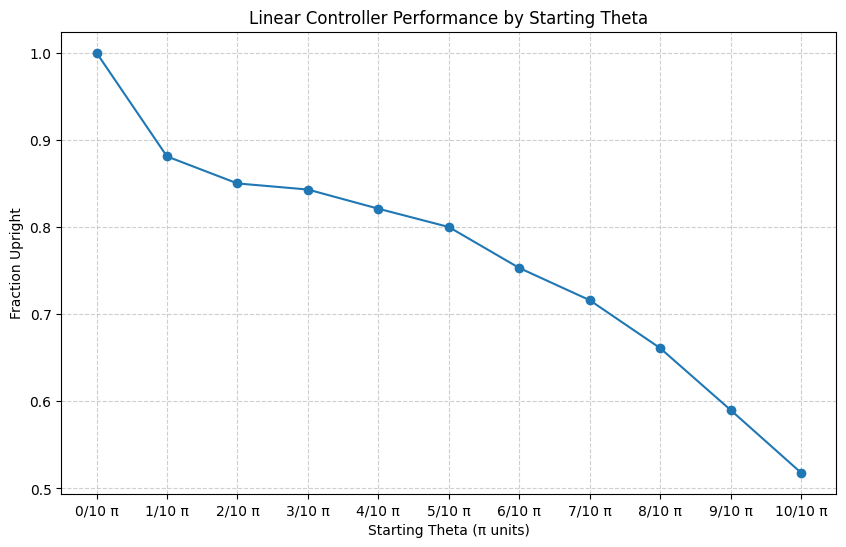

In [67]:
# Data for starting theta analysis
start_theta = np.array([0, 1/10*np.pi, 2/10*np.pi, 3/10*np.pi, 4/10*np.pi, 5/10*np.pi, 6/10*np.pi, 7/10*np.pi, 8/10*np.pi, 9/10*np.pi, np.pi])
fraction_upright_theta = np.array([1.000, 0.881, 0.850, 0.843, 0.821, 0.800, 0.753, 0.716, 0.661, 0.590, 0.518])

# Plot fraction upright vs. starting theta
plt.figure(figsize=(10, 6))
plt.plot(start_theta, fraction_upright_theta, marker='o', linestyle='-', color='tab:blue')
plt.xticks(start_theta, [f'{i}/10 π' for i in range(11)])
plt.xlabel('Starting Theta (π units)')
plt.ylabel('Fraction Upright')
plt.title('Linear Controller Performance by Starting Theta')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [72]:
import re
from collections import defaultdict

# Define the log file path
log_file_path = "output_log_with_cropping.txt"

# Define regex pattern to extract iteration numbers and corresponding metrics
pattern = re.compile(
    r"metrics/val-cls_accuracy \[(\d+)\]: (?P<cls_accuracy>\d+\.\d+)|"
    r"metrics/val-cls_R_accuracy \[(\d+)\]: (?P<cls_R_accuracy>\d+\.\d+)|"
    r"metrics/val-cls_t_accuracy \[(\d+)\]: (?P<cls_t_accuracy>\d+\.\d+)|"
    r"metrics/val-cls_R_t_accuracy \[(\d+)\]: (?P<cls_R_t_accuracy>\d+\.\d+)|"
    r"metrics/val-overall \[(\d+)\]: (?P<overall>\d+\.\d+)"
)

# Dictionary to store extracted metrics
metrics = defaultdict(lambda: {
    "cls_accuracy": None,
    "cls_R_accuracy": None,
    "cls_t_accuracy": None,
    "cls_R_t_accuracy": None,
    "overall": None,
})

# Read the log file and extract relevant information
with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Extract iteration number from non-None match groups
            iteration = next((g for g in match.groups() if g is not None), None)

            if iteration is not None:  # Ensure iteration is valid
                for key, value in match.groupdict().items():
                    if value is not None:
                        metrics[iteration][key] = float(value)

# Convert iteration keys to integers and sort them
sorted_metrics = dict(sorted(metrics.items(), key=lambda x: int(x[0])))

# Print extracted metrics
for iteration, values in sorted_metrics.items():
    print(f"Iteration {iteration}: {values}")

Iteration 0001000: {'cls_accuracy': 0.797799, 'cls_R_accuracy': 0.072902, 'cls_t_accuracy': 0.068776, 'cls_R_t_accuracy': 0.004127, 'overall': 0.943604}
Iteration 0002000: {'cls_accuracy': 0.839065, 'cls_R_accuracy': 0.233838, 'cls_t_accuracy': 0.10729, 'cls_R_t_accuracy': 0.008253, 'overall': 1.188446}
Iteration 0003000: {'cls_accuracy': 0.876204, 'cls_R_accuracy': 0.27923, 'cls_t_accuracy': 0.261348, 'cls_R_t_accuracy': 0.094911, 'overall': 1.511692}
Iteration 0004000: {'cls_accuracy': 0.89271, 'cls_R_accuracy': 0.302613, 'cls_t_accuracy': 0.342503, 'cls_R_t_accuracy': 0.114168, 'overall': 1.651994}
Iteration 0005000: {'cls_accuracy': 0.89271, 'cls_R_accuracy': 0.371389, 'cls_t_accuracy': 0.099037, 'cls_R_t_accuracy': 0.017882, 'overall': 1.381018}
Iteration 0006000: {'cls_accuracy': 0.889959, 'cls_R_accuracy': 0.364512, 'cls_t_accuracy': 0.456671, 'cls_R_t_accuracy': 0.206327, 'overall': 1.917469}
Iteration 0007000: {'cls_accuracy': 0.889959, 'cls_R_accuracy': 0.415406, 'cls_t_accur

In [73]:
sorted_metrics

{'0001000': {'cls_accuracy': 0.797799,
  'cls_R_accuracy': 0.072902,
  'cls_t_accuracy': 0.068776,
  'cls_R_t_accuracy': 0.004127,
  'overall': 0.943604},
 '0002000': {'cls_accuracy': 0.839065,
  'cls_R_accuracy': 0.233838,
  'cls_t_accuracy': 0.10729,
  'cls_R_t_accuracy': 0.008253,
  'overall': 1.188446},
 '0003000': {'cls_accuracy': 0.876204,
  'cls_R_accuracy': 0.27923,
  'cls_t_accuracy': 0.261348,
  'cls_R_t_accuracy': 0.094911,
  'overall': 1.511692},
 '0004000': {'cls_accuracy': 0.89271,
  'cls_R_accuracy': 0.302613,
  'cls_t_accuracy': 0.342503,
  'cls_R_t_accuracy': 0.114168,
  'overall': 1.651994},
 '0005000': {'cls_accuracy': 0.89271,
  'cls_R_accuracy': 0.371389,
  'cls_t_accuracy': 0.099037,
  'cls_R_t_accuracy': 0.017882,
  'overall': 1.381018},
 '0006000': {'cls_accuracy': 0.889959,
  'cls_R_accuracy': 0.364512,
  'cls_t_accuracy': 0.456671,
  'cls_R_t_accuracy': 0.206327,
  'overall': 1.917469},
 '0007000': {'cls_accuracy': 0.889959,
  'cls_R_accuracy': 0.415406,
  'cl

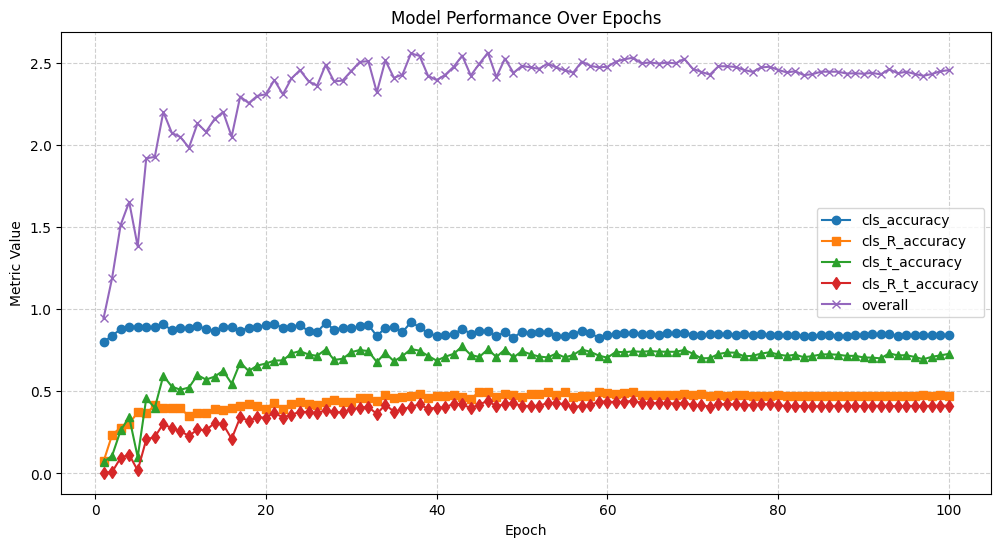

In [74]:
import matplotlib.pyplot as plt

# Assuming `metrics_dict` is your defaultdict storing the metrics
metrics_dict = sorted_metrics

# Extract sorted iterations (as integers)
iterations = sorted(metrics_dict.keys(), key=lambda x: int(x))

# Extract metrics
cls_accuracy = [metrics_dict[it]['cls_accuracy'] for it in iterations]
cls_R_accuracy = [metrics_dict[it]['cls_R_accuracy'] for it in iterations]
cls_t_accuracy = [metrics_dict[it]['cls_t_accuracy'] for it in iterations]
cls_R_t_accuracy = [metrics_dict[it]['cls_R_t_accuracy'] for it in iterations]
overall = [metrics_dict[it]['overall'] for it in iterations]

# Convert iterations to epochs (assuming 1000 iterations = 1 epoch)
epochs = [int(it) // 1000 for it in iterations]

# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(epochs, cls_accuracy, marker='o', linestyle='-', label="cls_accuracy")
plt.plot(epochs, cls_R_accuracy, marker='s', linestyle='-', label="cls_R_accuracy")
plt.plot(epochs, cls_t_accuracy, marker='^', linestyle='-', label="cls_t_accuracy")
plt.plot(epochs, cls_R_t_accuracy, marker='d', linestyle='-', label="cls_R_t_accuracy")
plt.plot(epochs, overall, marker='x', linestyle='-', label="overall")

# Labels and title
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Model Performance Over Epochs")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()
